In [17]:
import numpy as np
from scipy import stats
import matplotlib as mpl
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties


In [126]:
def mad(points, thresh=2):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * np.sum(points-median, axis=-1) / med_abs_deviation

    return points.flatten()[modified_z_score < thresh]
mad = lambda x: x
mad(np.array([-4, 1, 1.1, 1.2, 1.2, 1.3, 1.4, 6]))

array([-4. ,  1. ,  1.1,  1.2,  1.2,  1.3,  1.4,  6. ])

In [40]:
def single_boot(x, f, B=10000):
    tstar = np.zeros(B)
    for b_id in range(B):
        b_data = np.random.choice(x, size=x.size, replace=True)
        tstar[b_id] = f(b_data)
    return tstar

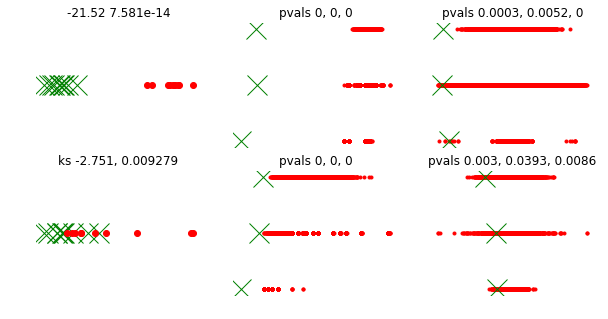

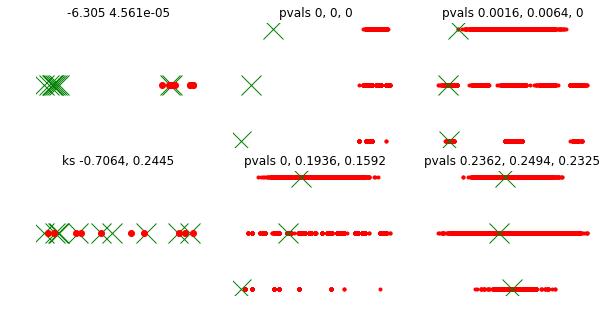

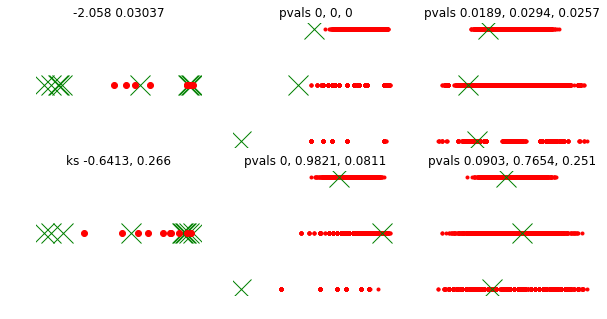

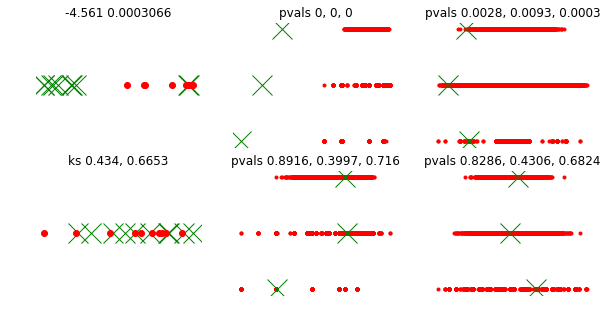

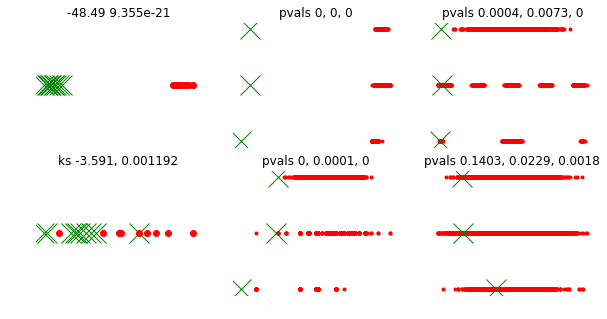

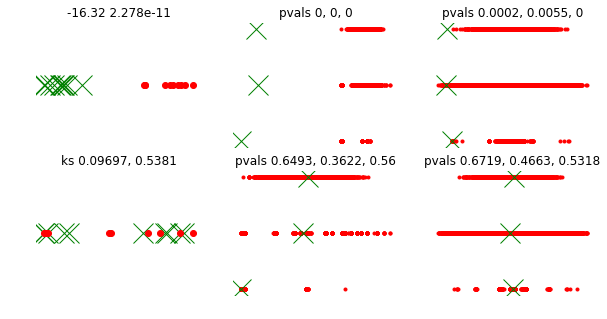

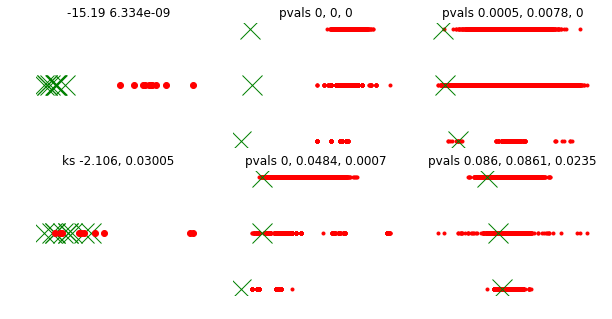

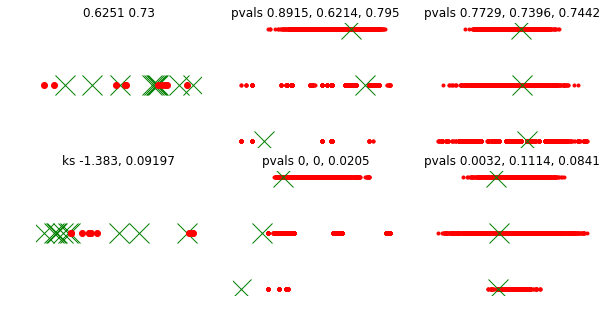

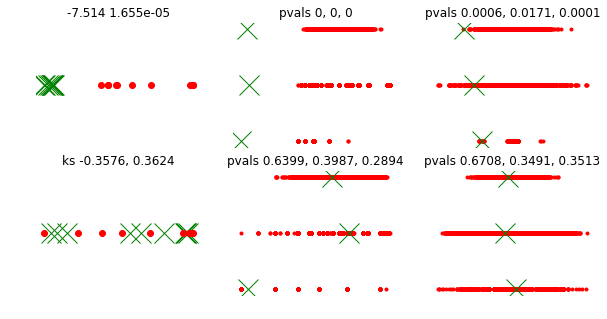

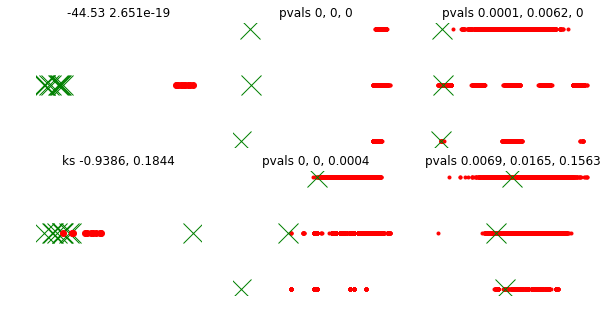

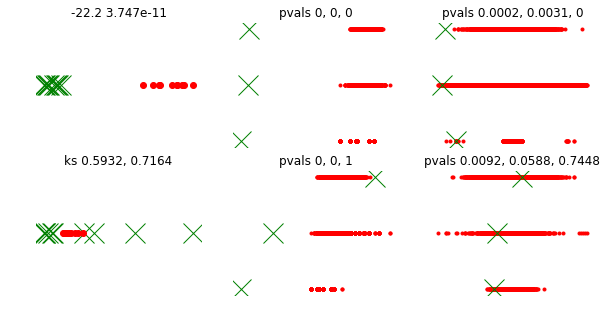

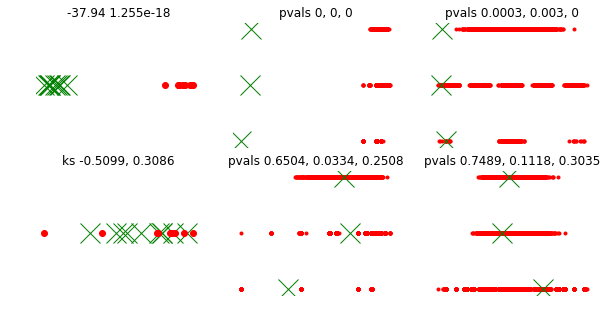

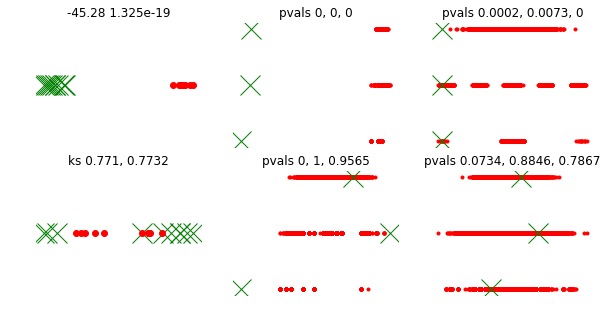

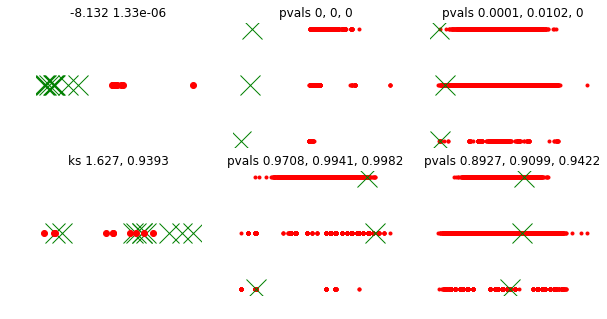

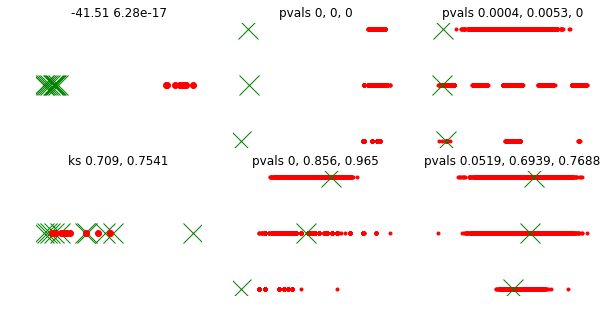

In [138]:
from independence_test.methods.cond_nn import bootstrap
from scipy.stats import ttest_ind as ks_2samp
from collections import defaultdict
res = joblib.load('../saved_data/tmp_stats_perm')
CASE = res.keys()[0]

double_fs = [lambda x, y: np.min(x) - np.min(y),
          lambda x, y: np.median(x) - np.median(y),
          lambda x, y: np.mean(x) - np.mean(y)]

single_fs = [lambda x: np.min(x),
            lambda x: np.median(x),
            lambda x: np.mean(x)]

BOOT = 0
pvals = defaultdict(list)

for kid, key in enumerate(res.keys()):
    d1 = mad(res[key][0][0])
    d0 = mad(res[key][0][1])
    i1 = mad(res[key][0][2])
    i0 = mad(res[key][0][3])
    plt.figure(figsize=(10, 5), facecolor='white')
    plt.subplot(2, 3, 1)
    plt.plot(d1, np.ones(d1.size), 'gx', markersize=20)
    plt.plot(d0, np.ones(d0.size), 'ro')
    
    tstat = ks_2samp(d1, d0, equal_var=False)
    if tstat[0] > 0:
        tstat = tstat[0], 1 - tstat[1]/2
    else:
        tstat = tstat[0], tstat[1]/2

    plt.title('{:.4g} {:.4g}'.format(tstat[0], tstat[1]))
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    ps = []
    for BOOT in range(3):
        boot = single_boot(d0, single_fs[BOOT])
        stat = single_fs[BOOT](d1)
        plt.plot(boot, np.ones(sgl_b.size) + BOOT, 'r.')
        plt.plot(stat, BOOT + 1, 'gx', markersize=20)
        ps.append(np.sum(stat > boot) / float(boot.size))
        pvals[str(BOOT)+'d'].append(ps[-1])
        plt.axis('off')
    plt.title('pvals {:.4g}, {:.4g}, {:.4g}'.format(ps[0], ps[1], ps[2]))

        
    plt.subplot(2, 3, 3)
    ps = []
    for BOOT in range(3):
        boot = bootstrap(d1, d0, double_fs[BOOT])
        stat = double_fs[BOOT](d1, d0)
        plt.plot(boot, np.ones(sgl_b.size) + BOOT, 'r.')
        plt.plot(stat, BOOT + 1, 'gx', markersize=20)
        ps.append(np.sum(stat > boot) / float(boot.size))
        plt.axis('off')
        pvals[str(BOOT+3)+'d'].append(ps[-1])

    plt.title('pvals {:.4g}, {:.4g}, {:.4g}'.format(ps[0], ps[1], ps[2]))
        
    
    plt.subplot(2, 3, 4)
    plt.plot(i1, np.ones(i1.size), 'gx', markersize=20)
    plt.plot(i0, np.ones(i0.size), 'ro')
    
    tstat = ks_2samp(i1, i0, equal_var=False)
    if tstat[0] > 0:
        tstat = tstat[0], 1 - tstat[1]/2
    else:
        tstat = tstat[0], tstat[1]/2

    plt.title('ks {:.4g}, {:.4g}'.format(tstat[0], tstat[1]))
    plt.axis('off')
    pvals['KS_i'].append(tstat)
    
    plt.subplot(2, 3, 5)
    ps = []
    for BOOT in range(3):
        boot = single_boot(i0, single_fs[BOOT])
        stat = single_fs[BOOT](i1)
        plt.plot(boot, np.ones(sgl_b.size) + BOOT, 'r.')
        plt.plot(stat, BOOT + 1, 'gx', markersize=20)
        ps.append(np.sum(stat > boot) / float(boot.size))
        plt.axis('off')
        pvals[str(BOOT)+'i'].append(ps[-1])

    plt.title('pvals {:.4g}, {:.4g}, {:.4g}'.format(ps[0], ps[1], ps[2]))

        
    plt.subplot(2, 3, 6)
    ps = []
    for BOOT in range(3):
        boot = bootstrap(i1, i0, double_fs[BOOT])
        stat = double_fs[BOOT](i1, i0)
        plt.plot(boot, np.ones(sgl_b.size) + BOOT, 'r.')
        plt.plot(stat, BOOT + 1, 'gx', markersize=20)
        ps.append(np.sum(stat > boot) / float(boot.size))
        plt.axis('off')
        pvals[str(BOOT+3)+'i'].append(ps[-1])

    plt.title('pvals {:.4g}, {:.4g}, {:.4g}'.format(ps[0], ps[1], ps[2]))
        